<a href="https://colab.research.google.com/github/quangphuc2509/AI-Homework/blob/main/AutomobileCruiseControl2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b9179a3d8cc95070b4623f49ac60d5064f9deeb9992a480f30d669b2633b3369
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


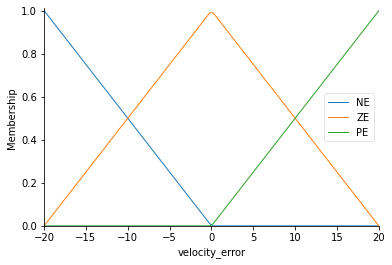

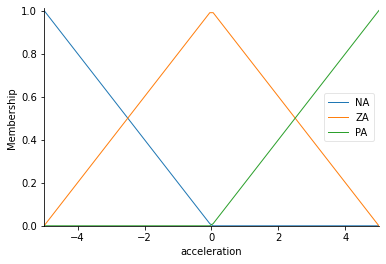

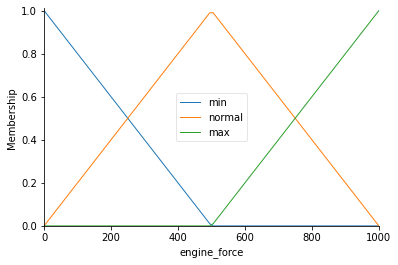

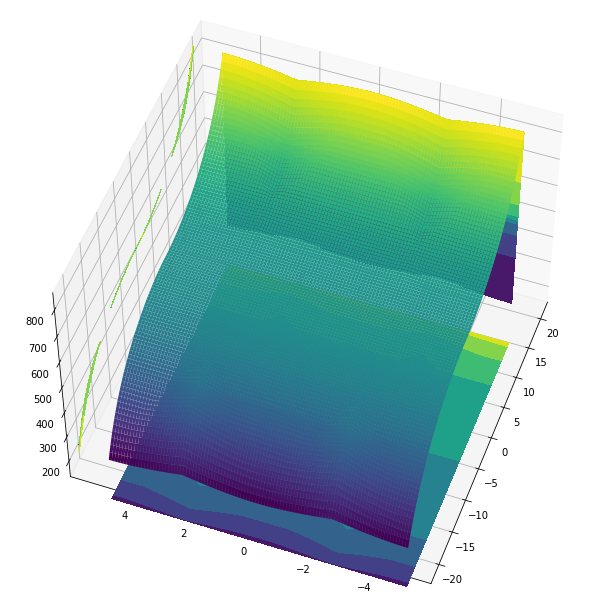

In [10]:
#EX5: Automobile cruise control
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

universe = np.linspace(-20,20,100)
universe1 = np.linspace(-5,5,100) 
universe2 = np.linspace(0,1000,100) 

#Khai báo các biến vào-ra
velocity_error = ctrl.Antecedent(universe,'velocity_error')
acceleration = ctrl.Antecedent(universe1,'acceleration')
engine_force = ctrl.Consequent(universe2,'engine_force')


velocity_error['NE'] = fuzzy.trimf(velocity_error.universe,[-20,-20,0])
velocity_error['ZE'] = fuzzy.trimf(velocity_error.universe,[-20,0,20])
velocity_error['PE']  = fuzzy.trimf(velocity_error.universe,[0,20,20])
velocity_error.view()

acceleration['NA'] = fuzzy.trimf(acceleration.universe,[-5,-5,0])
acceleration['ZA'] = fuzzy.trimf(acceleration.universe,[-5,0,5])
acceleration['PA']  = fuzzy.trimf(acceleration.universe,[0,5,5])
acceleration.view()

engine_force['min'] = fuzzy.trimf(engine_force.universe,[0,0,500])
engine_force['normal'] = fuzzy.trimf(engine_force.universe,[0,500,1000])
engine_force['max']  = fuzzy.trimf(engine_force.universe,[500,1000,1000])
engine_force.view()

#Rule
rule1 = ctrl.Rule(antecedent=((velocity_error['NE']&acceleration['NA'])|(velocity_error['NE']&acceleration['ZA'])
                              |(velocity_error['NE']&acceleration['PA']))
                              ,consequent=(engine_force['min']))

rule2 = ctrl.Rule(antecedent=((velocity_error['ZE']&acceleration['NA'])|(velocity_error['ZE']&acceleration['ZA'])
                              |(velocity_error['ZE']&acceleration['PA']))
                              ,consequent=(engine_force['normal']))

rule3 = ctrl.Rule(antecedent=((velocity_error['PE']&acceleration['NA'])|(velocity_error['PE']&acceleration['ZA'])
                              |(velocity_error['PE']&acceleration['PA']))
                              ,consequent=(engine_force['max']))

#Thêm Thư Viện 
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


System  = ctrl.ControlSystem(rules = [rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(System)

#Khai báo dữ liệu
upSampled1 = np.linspace(-20,20,100)
upSampled2 = np.linspace(-5,5,100)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

#Tính toán
for i in range(100):
  for j in range(100):
    sim.input['velocity_error']= x[i,j]
    sim.input['acceleration']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['engine_force']

#Hiển Thị Kết Quả
fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',linewidth= 0.4, antialiased= True)

#Chiếu 3 hình chiếu
cset = ax.contourf(x,y,z, zdir= 'z', offset= 0, cmap= 'viridis')
cset = ax.contourf(x,y,z, zdir= 'x', offset= 20, cmap= 'viridis')
cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis')
ax.view_init(50,200)